In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
#sys.path.append('/content/drive/MyDrive/SymLink_Colab_Notebooks/NM')
dev_name = 'Examples' # Dev Project Name: Neuromorphic
pg_path = '/content/drive/MyDrive/CodeData/[Packages]/'+dev_name
sys.path.append(pg_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from SimpleLSM.timeseries import MackeyGlass
from SimpleLSM.spikecoding import step_forward, rate_encoding, combine_dataset
from SimpleLSM.LSM import LSM
from SimpleLSM.visualizer import show_dataset, show_states, show_learning, plot_spikes
import matplotlib.pyplot as plt

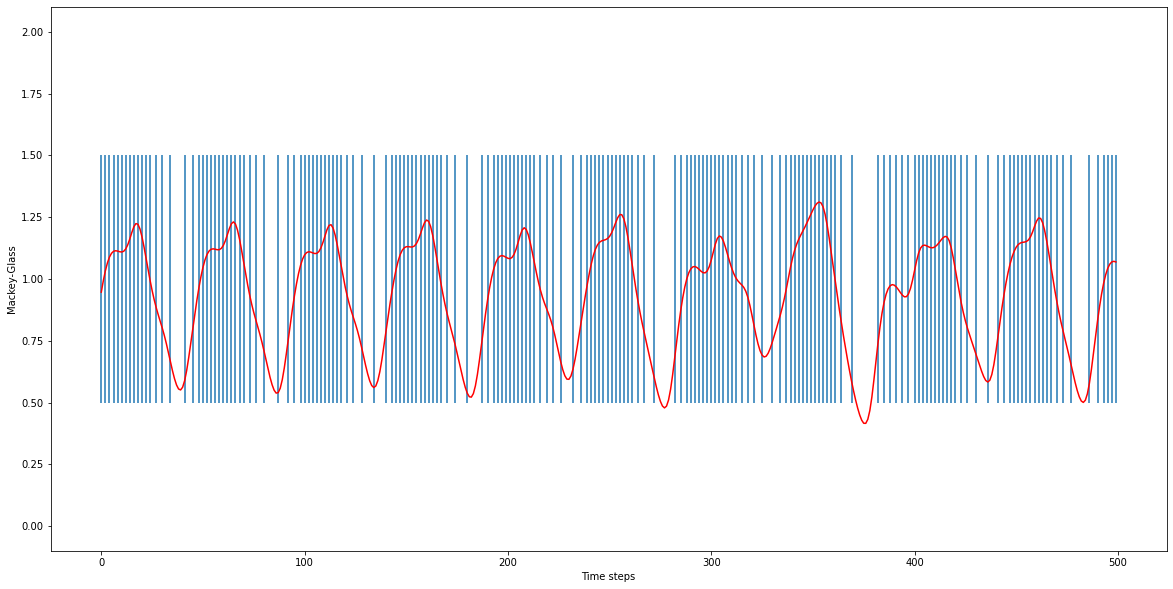

In [ ]:
L = 100000
x, y = MackeyGlass(seed=1).get_prediction_set(length=L, k=300)
r = rate_encoding(x)
t = step_forward(x)
show_dataset(L-500, L, x, r)

In [ ]:
t

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int8)

In [ ]:
show_dataset(L-500, L, y, r)

In [ ]:
show_dataset(L-500, L, x, t)

In [ ]:
show_dataset(L-500, L, y, t)

In [ ]:
import pandas as pd

L = 100000
for i in range(1,101):
  x, y = MackeyGlass(seed=i*10+i).get_prediction_set(length=L, k=300)
  r = rate_encoding(x)
  t = step_forward(x)

  x_df=pd.DataFrame(x).T
  #y_df=pd.DataFrame(y).T
  r_df=pd.DataFrame(r).T
  t_df=pd.DataFrame(t).T

  #result_data=pd.concat([x_df, y_df, r_df, t_df],axis=1)
  result_data=pd.concat([x_df, r_df, t_df],axis=1)

  file_name = f'/content/drive/MyDrive/CodeData/NM/MG_result_{i:03}.csv'
  result_data.to_csv(file_name)

  print(f'{i} done\n')